In [7]:
import sys
sys.path.append('../models')
import svm
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl

In [8]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['font.size']=20
plt.rcParams["text.usetex"]=True
# plt.rcParams.update({'figure.autolayout': True})

# Train model for different values of gamma and evaluate performance

In [9]:
def assess_model_performance_svm(SVM_model, c_range, gamma_range):
    
    train_accuracy_matrix = []
    test_accuracy_matrix = []

    # Build model
    for i in range(len(c_range)):

        train_accuracy_list = []
        test_accuracy_list = []

        for gamma in gamma_range:
            SVM_model.build(kernel='rbf', gamma=gamma, c=c_range[i])
            train_accuracy_list.append(SVM_model.train())
            test_accuracy_list.append(SVM_model.evaluate())

        train_accuracy_matrix.append(train_accuracy_list)
        test_accuracy_matrix.append(test_accuracy_list)
    
    return train_accuracy_matrix, test_accuracy_matrix

## kmer frequency dataset

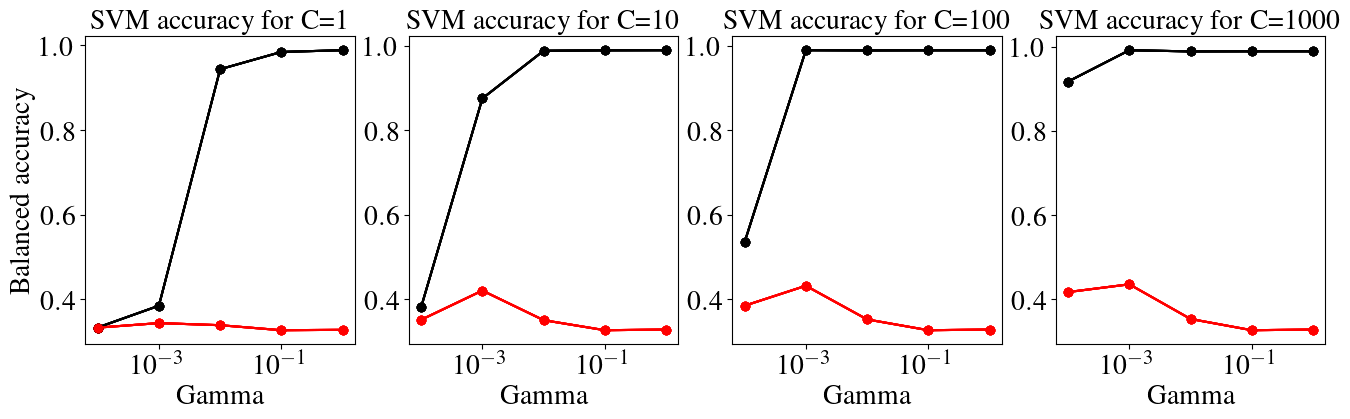

In [4]:
SVM_model = svm.SVM()

# Load data matrix
data_matrix_file_name = '../data/featurized_data_matrix/featurization_composition_mathfeatures/kmer_frequency_with_labels.csv'
SVM_model.load_data(data_matrix_file_name)

# Split train and test data
SVM_model.split_train_test()

# Sweep through the hyperparameters gamma and C, to obtain the best model
c_range = [1, 10, 100, 1000]
gamma_range = [1e-4, 1e-3, 1e-2, 1e-1, 1]

train_accuracy_matrix, test_accuracy_matrix = assess_model_performance_svm(SVM_model=SVM_model, 
                                                                           c_range=c_range, 
                                                                           gamma_range=gamma_range)

plot_name = 'SVM_performance/SVM_performance_kmer_data'

# Save plot data to pickle file
C_mat, Gamma = np.meshgrid(c_range, gamma_range)
with open(plot_name + '.pkl', 'wb') as f:
    pkl.dump({'C_values': C_mat, 'gamma_values': Gamma, 'accuracy': test_accuracy_matrix}, f)
    
# Plot the SVM performance data
fig, axs = plt.subplots(1, len(c_range), figsize=(4*len(c_range), 4))

for i in range(len(c_range)):
    for gamma in gamma_range:
        axs[i].plot(gamma_range, train_accuracy_matrix[i], '-ko', label='Train accuracy')
        axs[i].plot(gamma_range, test_accuracy_matrix[i], '-ro', label='Test accuracy')
        axs[i].set_xlabel('Gamma', fontsize=20)
        axs[i].set_title('SVM accuracy for C={}'.format(c_range[i]), fontsize=20)
        axs[i].set_xscale('log')

        axs[0].set_ylabel('Balanced accuracy', fontsize=20)

plt.savefig(plot_name + '.svg', format='svg', dpi=600)
plt.savefig(plot_name + '.png', format='png', dpi=600)

## Composition dataset

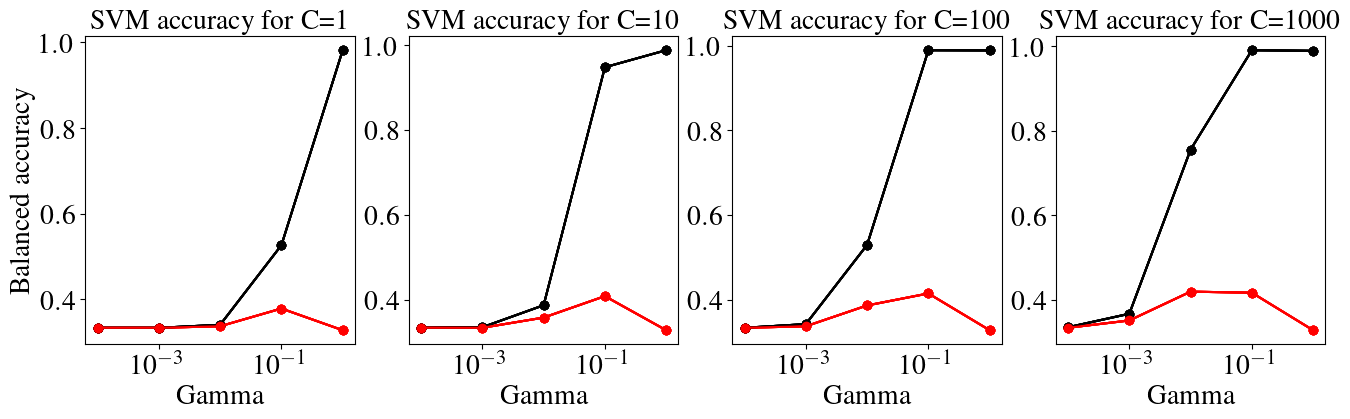

In [5]:
# Load data matrix
data_matrix_file_name = '../data/featurized_data_matrix/featurization_composition_mathfeatures/aa_composition_with_labels.csv'
SVM_model.load_data(data_matrix_file_name)

# Split train and test data
SVM_model.split_train_test()

# Sweep through the hyperparameters gamma and C, to obtain the best model
c_range = [1, 10, 100, 1000]
gamma_range = [1e-4, 1e-3, 1e-2, 1e-1, 1]

train_accuracy_matrix = []
test_accuracy_matrix = []

# Build model
for i in range(len(c_range)):
    
    train_accuracy_list = []
    test_accuracy_list = []
    
    for gamma in gamma_range:
        SVM_model.build(kernel='rbf', gamma=gamma, c=c_range[i])
        train_accuracy_list.append(SVM_model.train())
        test_accuracy_list.append(SVM_model.evaluate())
        
    train_accuracy_matrix.append(train_accuracy_list)
    test_accuracy_matrix.append(test_accuracy_list)

plot_name = 'SVM_performance/SVM_performance_composition_data'

fig, axs = plt.subplots(1, len(c_range), figsize=(16, 4))

for i in range(len(c_range)):
    for gamma in gamma_range:
        axs[i].plot(gamma_range, train_accuracy_matrix[i], '-ko', label='Train accuracy')
        axs[i].plot(gamma_range, test_accuracy_matrix[i], '-ro', label='Test accuracy')
        axs[i].set_xlabel('Gamma', fontsize=20)
        axs[i].set_title('SVM accuracy for C={}'.format(c_range[i]), fontsize=20)
        axs[i].set_xscale('log')

        axs[0].set_ylabel('Balanced accuracy', fontsize=20)
        
plt.savefig(plot_name + '.svg', format='svg', dpi=600)
plt.savefig(plot_name + '.png', format='png', dpi=600)

C_mat, Gamma = np.meshgrid(c_range, gamma_range)
with open(plot_name + '.pkl', 'wb') as f:
    pkl.dump({'C_values': C_mat, 'gamma_values': Gamma, 'accuracy': test_accuracy_matrix}, f)

## Original dataset

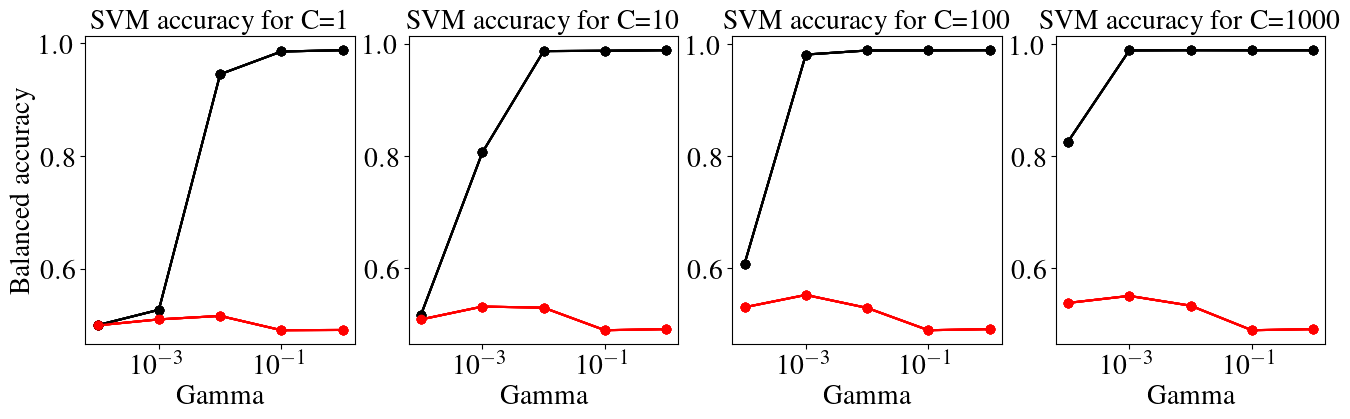

In [25]:
# Load data matrix
data_matrix_file_name = '../data/featurized_data_matrix/featurization_2019/normData.csv'
SVM_model.load_data(data_matrix_file_name)

# Split train and test data
SVM_model.split_train_test()

# Sweep through the hyperparameters gamma and C, to obtain the best model
c_range = [1, 10, 100, 1000]
gamma_range = [1e-4, 1e-3, 1e-2, 1e-1, 1]

train_accuracy_matrix = []
test_accuracy_matrix = []

# Build model
for i in range(len(c_range)):
    
    train_accuracy_list = []
    test_accuracy_list = []
    
    for gamma in gamma_range:
        SVM_model.build(kernel='rbf', gamma=gamma, c=c_range[i])
        train_accuracy_list.append(SVM_model.train())
        test_accuracy_list.append(SVM_model.evaluate())
        
    train_accuracy_matrix.append(train_accuracy_list)
    test_accuracy_matrix.append(test_accuracy_list)

plot_name = 'SVM_performance/SVM_performance_original_data'

fig, axs = plt.subplots(1, len(c_range), figsize=(16, 4))

for i in range(len(c_range)):
    for gamma in gamma_range:
        axs[i].plot(gamma_range, train_accuracy_matrix[i], '-ko', label='Train accuracy')
        axs[i].plot(gamma_range, test_accuracy_matrix[i], '-ro', label='Test accuracy')
        axs[i].set_xlabel('Gamma', fontsize=20)
        axs[i].set_title('SVM accuracy for C={}'.format(c_range[i]), fontsize=20)
        axs[i].set_xscale('log')

        axs[0].set_ylabel('Balanced accuracy', fontsize=20)
        
plt.savefig(plot_name + '.svg', format='svg', dpi=600)
plt.savefig(plot_name + '.png', format='png', dpi=600)

C_mat, Gamma = np.meshgrid(c_range, gamma_range)
with open(plot_name + '.pkl', 'wb') as f:
    pkl.dump({'C_values': C_mat, 'gamma_values': Gamma, 'accuracy': test_accuracy_matrix}, f)

In [27]:
train_accuracy_matrix

[[0.5003225806451613,
  0.5275776612117976,
  0.9451593010229189,
  0.9854838709677419,
  0.987741935483871],
 [0.5178962632576353,
  0.8065761011820628,
  0.9870927955942248,
  0.987741935483871,
  0.9887096774193549],
 [0.6085036278543833,
  0.9812783867826742,
  0.9885454031472815,
  0.9887096774193549,
  0.9890322580645161],
 [0.8262395954392687,
  0.9888620158934573,
  0.9891885751379422,
  0.9890322580645161,
  0.9890322580645161]]

In [26]:
plot_name = 'SVM_performance/SVM_performance_original_data'
with open(plot_name + '.pkl', 'rb') as f:
    data = pkl.load(f)
print(data)

{'C_values': array([[   1,   10,  100, 1000],
       [   1,   10,  100, 1000],
       [   1,   10,  100, 1000],
       [   1,   10,  100, 1000],
       [   1,   10,  100, 1000]]), 'gamma_values': array([[1.e-04, 1.e-04, 1.e-04, 1.e-04],
       [1.e-03, 1.e-03, 1.e-03, 1.e-03],
       [1.e-02, 1.e-02, 1.e-02, 1.e-02],
       [1.e-01, 1.e-01, 1.e-01, 1.e-01],
       [1.e+00, 1.e+00, 1.e+00, 1.e+00]]), 'accuracy': [[0.5, 0.5105771199690743, 0.516713457074346, 0.4913710450623202, 0.49185043144774687], [0.5091389608127943, 0.5320413822403133, 0.5301018289403934, 0.4899328859060403, 0.49185043144774687], [0.5308338261157455, 0.5528301020203121, 0.529700904997292, 0.4899328859060403, 0.49185043144774687], [0.5385786432886863, 0.5511479438055815, 0.5336929209653559, 0.4899328859060403, 0.49185043144774687]]}


## Dataset with 470 reduced features

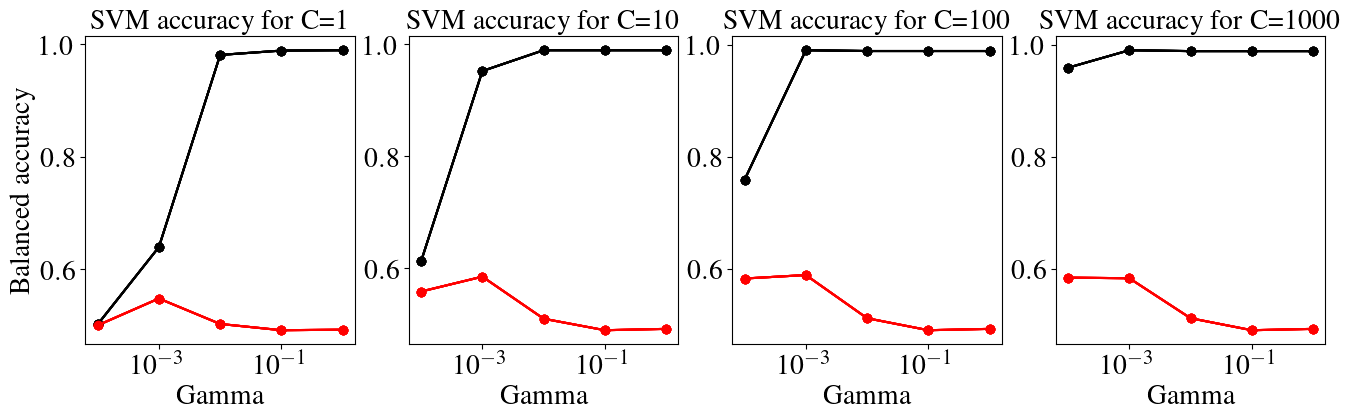

In [7]:
# Load data matrix
data_matrix_file_name = '../data/featurized_data_matrix/featurization_2019/preprocessed470.csv'
SVM_model.load_data(data_matrix_file_name)

# Split train and test data
SVM_model.split_train_test()

# Sweep through the hyperparameters gamma and C, to obtain the best model
c_range = [1, 10, 100, 1000]
gamma_range = [1e-4, 1e-3, 1e-2, 1e-1, 1]

train_accuracy_matrix = []
test_accuracy_matrix = []

# Build model
for i in range(len(c_range)):
    
    train_accuracy_list = []
    test_accuracy_list = []
    
    for gamma in gamma_range:
        SVM_model.build(kernel='rbf', gamma=gamma, c=c_range[i])
        train_accuracy_list.append(SVM_model.train())
        test_accuracy_list.append(SVM_model.evaluate())
        
    train_accuracy_matrix.append(train_accuracy_list)
    test_accuracy_matrix.append(test_accuracy_list)

plot_name = 'SVM_performance/SVM_performance_preprocessed470_data'

fig, axs = plt.subplots(1, len(c_range), figsize=(16, 4))

for i in range(len(c_range)):
    for gamma in gamma_range:
        axs[i].plot(gamma_range, train_accuracy_matrix[i], '-ko', label='Train accuracy')
        axs[i].plot(gamma_range, test_accuracy_matrix[i], '-ro', label='Test accuracy')
        axs[i].set_xlabel('Gamma', fontsize=20)
        axs[i].set_title('SVM accuracy for C={}'.format(c_range[i]), fontsize=20)
        axs[i].set_xscale('log')

        axs[0].set_ylabel('Balanced accuracy', fontsize=20)
        
plt.savefig(plot_name + '.svg', format='svg', dpi=600)
plt.savefig(plot_name + '.png', format='png', dpi=600)

C_mat, Gamma = np.meshgrid(c_range, gamma_range)
with open(plot_name + '.pkl', 'wb') as f:
    pkl.dump({'C_values': C_mat, 'gamma_values': Gamma, 'accuracy': test_accuracy_matrix}, f)

## Dataset with 178 reduced features

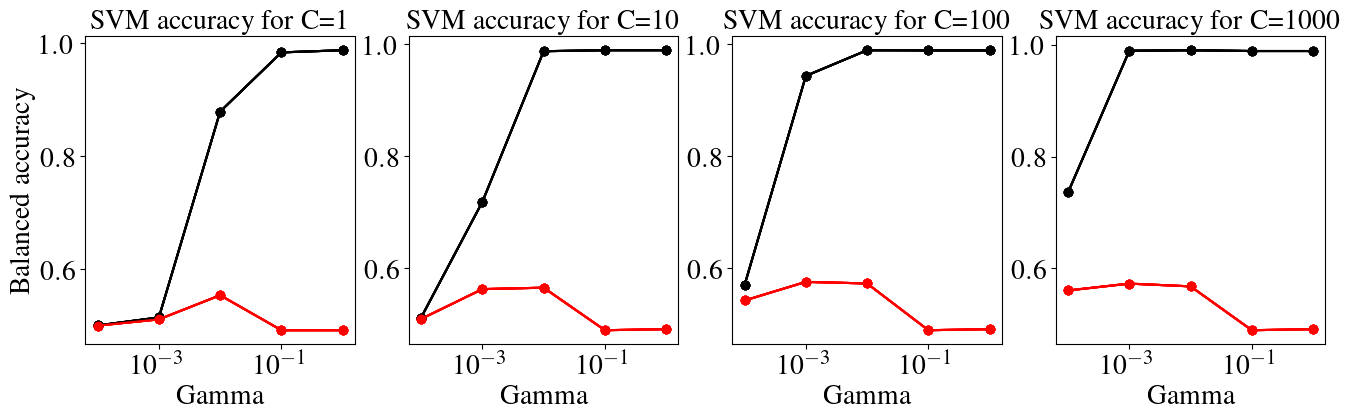

In [8]:
# Load data matrix
data_matrix_file_name = '../data/featurized_data_matrix/featurization_2019/preprocessed178.csv'
SVM_model.load_data(data_matrix_file_name)

# Split train and test data
SVM_model.split_train_test()

# Sweep through the hyperparameters gamma and C, to obtain the best model
c_range = [1, 10, 100, 1000]
gamma_range = [1e-4, 1e-3, 1e-2, 1e-1, 1]

train_accuracy_matrix = []
test_accuracy_matrix = []

# Build model
for i in range(len(c_range)):
    
    train_accuracy_list = []
    test_accuracy_list = []
    
    for gamma in gamma_range:
        SVM_model.build(kernel='rbf', gamma=gamma, c=c_range[i])
        train_accuracy_list.append(SVM_model.train())
        test_accuracy_list.append(SVM_model.evaluate())
        
    train_accuracy_matrix.append(train_accuracy_list)
    test_accuracy_matrix.append(test_accuracy_list)

plot_name = 'SVM_performance/SVM_performance_preprocessed178_data'

fig, axs = plt.subplots(1, len(c_range), figsize=(16, 4))

for i in range(len(c_range)):
    for gamma in gamma_range:
        axs[i].plot(gamma_range, train_accuracy_matrix[i], '-ko', label='Train accuracy')
        axs[i].plot(gamma_range, test_accuracy_matrix[i], '-ro', label='Test accuracy')
        axs[i].set_xlabel('Gamma', fontsize=20)
        axs[i].set_title('SVM accuracy for C={}'.format(c_range[i]), fontsize=20)
        axs[i].set_xscale('log')

        axs[0].set_ylabel('Balanced accuracy', fontsize=20)
        
plt.savefig(plot_name + '.svg', format='svg', dpi=600)
plt.savefig(plot_name + '.png', format='png', dpi=600)

C_mat, Gamma = np.meshgrid(c_range, gamma_range)
with open(plot_name + '.pkl', 'wb') as f:
    pkl.dump({'C_values': C_mat, 'gamma_values': Gamma, 'accuracy': test_accuracy_matrix}, f)

## Dataset with all features

NameError: name 'test_accuracy' is not defined

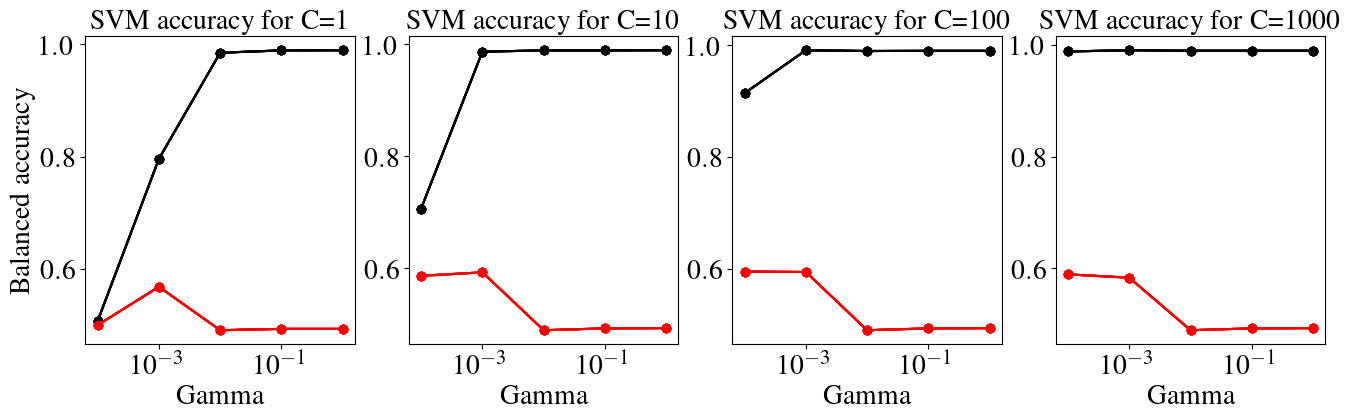

In [12]:
SVM_model = svm.SVM()

# Load data matrix
data_matrix_file_name = '../data/featurized_data_matrix/featurizations_for_term_project/Allfeats.csv'
SVM_model.load_data(data_matrix_file_name)

# Split train and test data
SVM_model.split_train_test()

# Sweep through the hyperparameters gamma and C, to obtain the best model
c_range = [1, 10, 100, 1000]
gamma_range = [1e-4, 1e-3, 1e-2, 1e-1, 1]

train_accuracy_matrix = []
test_accuracy_matrix = []

# Build model
for i in range(len(c_range)):
    
    train_accuracy_list = []
    test_accuracy_list = []
    
    for gamma in gamma_range:
        SVM_model.build(kernel='rbf', gamma=gamma, c=c_range[i])
        train_accuracy_list.append(SVM_model.train())
        test_accuracy_list.append(SVM_model.evaluate())
        
    train_accuracy_matrix.append(train_accuracy_list)
    test_accuracy_matrix.append(test_accuracy_list)

plot_name = 'SVM_performance/SVM_performance_all_features'

fig, axs = plt.subplots(1, len(c_range), figsize=(16, 4))

for i in range(len(c_range)):
    for gamma in gamma_range:
        axs[i].plot(gamma_range, train_accuracy_matrix[i], '-ko', label='Train accuracy')
        axs[i].plot(gamma_range, test_accuracy_matrix[i], '-ro', label='Test accuracy')
        axs[i].set_xlabel('Gamma', fontsize=20)
        axs[i].set_title('SVM accuracy for C={}'.format(c_range[i]), fontsize=20)
        axs[i].set_xscale('log')

        axs[0].set_ylabel('Balanced accuracy', fontsize=20)
        
plt.savefig(plot_name + '.svg', format='svg', dpi=600)
plt.savefig(plot_name + '.png', format='png', dpi=600)

C_mat, Gamma = np.meshgrid(c_range, gamma_range)
with open(plot_name + '.pkl', 'wb') as f:
    pkl.dump({'C_values': C_mat, 'gamma_values': Gamma, 'accuracy': test_accuracy_matrix}, f)
    
print(C_mat, Gamma, test_accuracy_matrix)

In [13]:
print(C_mat, Gamma, test_accuracy_matrix)

[[   1   10  100 1000]
 [   1   10  100 1000]
 [   1   10  100 1000]
 [   1   10  100 1000]
 [   1   10  100 1000]] [[1.e-04 1.e-04 1.e-04 1.e-04]
 [1.e-03 1.e-03 1.e-03 1.e-03]
 [1.e-02 1.e-02 1.e-02 1.e-02]
 [1.e-01 1.e-01 1.e-01 1.e-01]
 [1.e+00 1.e+00 1.e+00 1.e+00]] [[0.5, 0.5682001289846004, 0.49089165867689355, 0.49328859060402686, 0.49328859060402686], [0.5867832886480155, 0.5929110140218126, 0.4895319619629389, 0.4928092042186002, 0.49328859060402686], [0.5944974863312684, 0.5937434813977032, 0.4895319619629389, 0.4928092042186002, 0.49328859060402686], [0.5894902429082391, 0.5834802111979301, 0.4895319619629389, 0.4928092042186002, 0.49328859060402686]]


## Dataset with MRMR selected features

[[   1   10  100 1000]
 [   1   10  100 1000]
 [   1   10  100 1000]
 [   1   10  100 1000]
 [   1   10  100 1000]] [[1.e-04 1.e-04 1.e-04 1.e-04]
 [1.e-03 1.e-03 1.e-03 1.e-03]
 [1.e-02 1.e-02 1.e-02 1.e-02]
 [1.e-01 1.e-01 1.e-01 1.e-01]
 [1.e+00 1.e+00 1.e+00 1.e+00]] [[0.5, 0.5, 0.5030724744183732, 0.5111962077762021, 0.49089165867689355], [0.500998003992016, 0.5025930880329466, 0.5103551286688368, 0.5137290136888256, 0.4944827507018561], [0.5010372352131787, 0.5005492370962773, 0.540347875677217, 0.5137204019573509, 0.4944827507018561], [0.5025930880329466, 0.513750064587986, 0.523661210656348, 0.5172330315399881, 0.4944827507018561]]


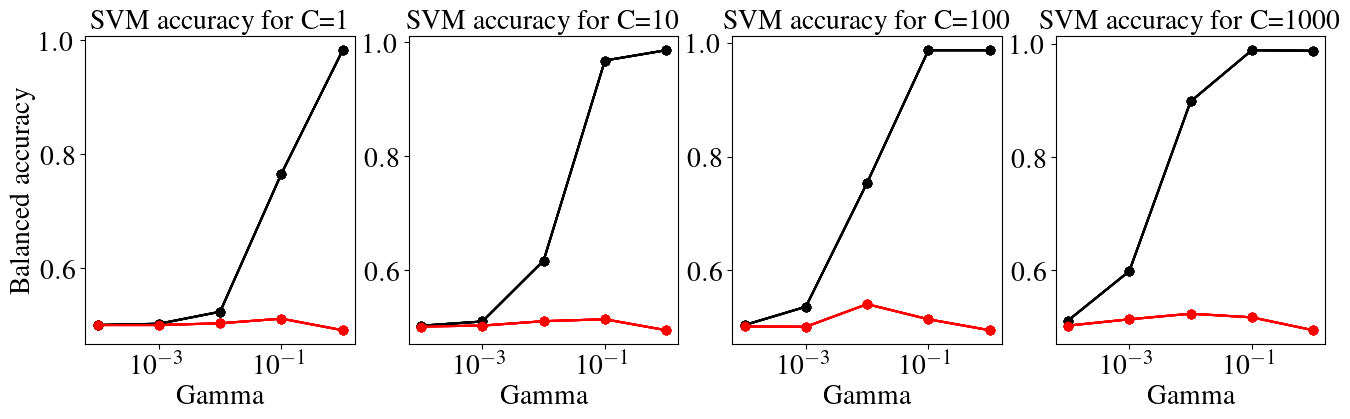

In [14]:
SVM_model = svm.SVM()

# Load data matrix
data_matrix_file_name = '../data/featurized_data_matrix/featurizations_for_term_project/mrmrfeat.csv'
SVM_model.load_data(data_matrix_file_name)

# Split train and test data
SVM_model.split_train_test()

# Sweep through the hyperparameters gamma and C, to obtain the best model
c_range = [1, 10, 100, 1000]
gamma_range = [1e-4, 1e-3, 1e-2, 1e-1, 1]

train_accuracy_matrix = []
test_accuracy_matrix = []

# Build model
for i in range(len(c_range)):
    
    train_accuracy_list = []
    test_accuracy_list = []
    
    for gamma in gamma_range:
        SVM_model.build(kernel='rbf', gamma=gamma, c=c_range[i])
        train_accuracy_list.append(SVM_model.train())
        test_accuracy_list.append(SVM_model.evaluate())
        
    train_accuracy_matrix.append(train_accuracy_list)
    test_accuracy_matrix.append(test_accuracy_list)

plot_name = 'SVM_performance/SVM_performance_mrmrfeatures'

fig, axs = plt.subplots(1, len(c_range), figsize=(16, 4))

for i in range(len(c_range)):
    for gamma in gamma_range:
        axs[i].plot(gamma_range, train_accuracy_matrix[i], '-ko', label='Train accuracy')
        axs[i].plot(gamma_range, test_accuracy_matrix[i], '-ro', label='Test accuracy')
        axs[i].set_xlabel('Gamma', fontsize=20)
        axs[i].set_title('SVM accuracy for C={}'.format(c_range[i]), fontsize=20)
        axs[i].set_xscale('log')

        axs[0].set_ylabel('Balanced accuracy', fontsize=20)
        
plt.savefig(plot_name + '.svg', format='svg', dpi=600)
plt.savefig(plot_name + '.png', format='png', dpi=600)

C_mat, Gamma = np.meshgrid(c_range, gamma_range)
with open(plot_name + '.pkl', 'wb') as f:
    pkl.dump({'C_values': C_mat, 'gamma_values': Gamma, 'accuracy': test_accuracy_matrix}, f)
    
print(C_mat, Gamma, test_accuracy_matrix)

## Dataset with original features and mathfeatures

[[   1   10  100 1000]
 [   1   10  100 1000]
 [   1   10  100 1000]
 [   1   10  100 1000]
 [   1   10  100 1000]] [[1.e-04 1.e-04 1.e-04 1.e-04]
 [1.e-03 1.e-03 1.e-03 1.e-03]
 [1.e-02 1.e-02 1.e-02 1.e-02]
 [1.e-01 1.e-01 1.e-01 1.e-01]
 [1.e+00 1.e+00 1.e+00 1.e+00]] [[0.5, 0.5612141010404885, 0.4899328859060403, 0.49232981783317353, 0.49232981783317353], [0.5902566870094901, 0.5930287076853006, 0.4895319619629389, 0.4913710450623202, 0.49232981783317353], [0.5998884302344496, 0.5911503933647566, 0.4895319619629389, 0.4913710450623202, 0.49232981783317353], [0.5868971548752926, 0.5884309999368473, 0.4895319619629389, 0.4913710450623202, 0.49232981783317353]]


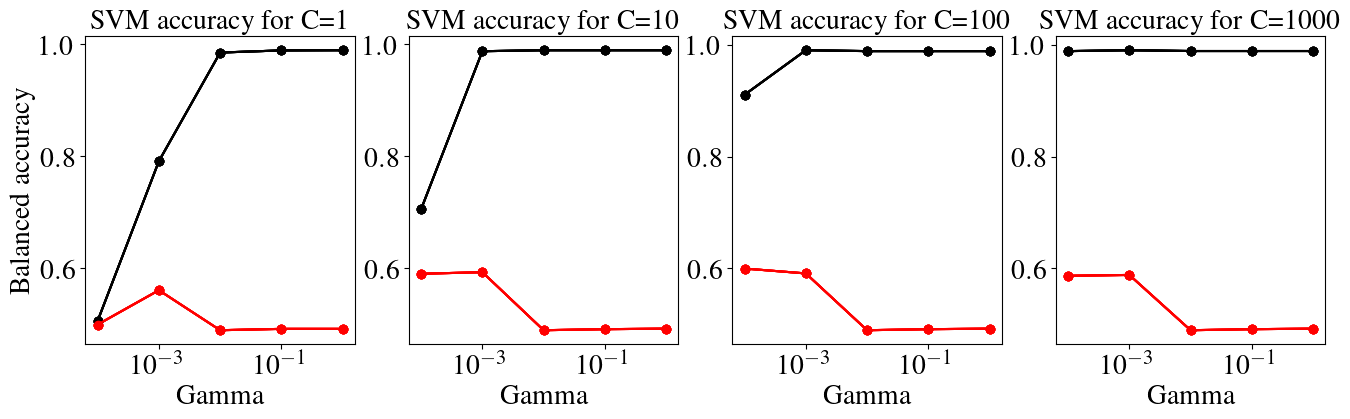

In [15]:
SVM_model = svm.SVM()

# Load data matrix
data_matrix_file_name = '../data/featurized_data_matrix/featurizations_for_term_project/Orig_MathFeat.csv'
SVM_model.load_data(data_matrix_file_name)

# Split train and test data
SVM_model.split_train_test()

# Sweep through the hyperparameters gamma and C, to obtain the best model
c_range = [1, 10, 100, 1000]
gamma_range = [1e-4, 1e-3, 1e-2, 1e-1, 1]

train_accuracy_matrix = []
test_accuracy_matrix = []

# Build model
for i in range(len(c_range)):
    
    train_accuracy_list = []
    test_accuracy_list = []
    
    for gamma in gamma_range:
        SVM_model.build(kernel='rbf', gamma=gamma, c=c_range[i])
        train_accuracy_list.append(SVM_model.train())
        test_accuracy_list.append(SVM_model.evaluate())
        
    train_accuracy_matrix.append(train_accuracy_list)
    test_accuracy_matrix.append(test_accuracy_list)

plot_name = 'SVM_performance/SVM_performance_orig_mathfeat'

fig, axs = plt.subplots(1, len(c_range), figsize=(16, 4))

for i in range(len(c_range)):
    for gamma in gamma_range:
        axs[i].plot(gamma_range, train_accuracy_matrix[i], '-ko', label='Train accuracy')
        axs[i].plot(gamma_range, test_accuracy_matrix[i], '-ro', label='Test accuracy')
        axs[i].set_xlabel('Gamma', fontsize=20)
        axs[i].set_title('SVM accuracy for C={}'.format(c_range[i]), fontsize=20)
        axs[i].set_xscale('log')

        axs[0].set_ylabel('Balanced accuracy', fontsize=20)
        
plt.savefig(plot_name + '.svg', format='svg', dpi=600)
plt.savefig(plot_name + '.png', format='png', dpi=600)

C_mat, Gamma = np.meshgrid(c_range, gamma_range)
with open(plot_name + '.pkl', 'wb') as f:
    pkl.dump({'C_values': C_mat, 'gamma_values': Gamma, 'accuracy': test_accuracy_matrix}, f)
    
print(C_mat, Gamma, test_accuracy_matrix)

## Dataset with 68 reduced features

NameError: name 'test_accuracy' is not defined

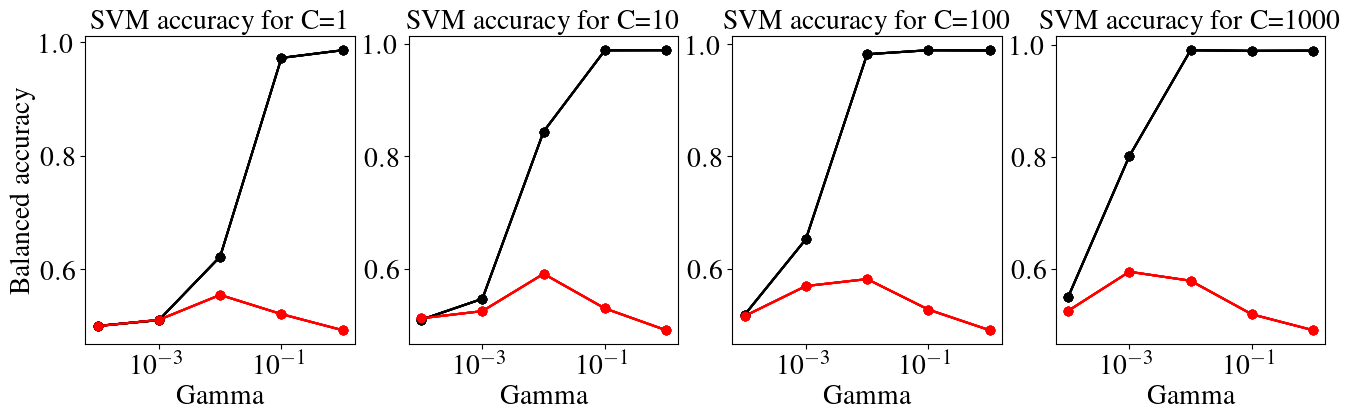

In [16]:
SVM_model = svm.SVM()

# Load data matrix
data_matrix_file_name = '../data/featurized_data_matrix/featurizations_for_term_project/preprocessed68.csv'
SVM_model.load_data(data_matrix_file_name)

# Split train and test data
SVM_model.split_train_test()

# Sweep through the hyperparameters gamma and C, to obtain the best model
c_range = [1, 10, 100, 1000]
gamma_range = [1e-4, 1e-3, 1e-2, 1e-1, 1]

train_accuracy_matrix = []
test_accuracy_matrix = []

# Build model
for i in range(len(c_range)):
    
    train_accuracy_list = []
    test_accuracy_list = []
    
    for gamma in gamma_range:
        SVM_model.build(kernel='rbf', gamma=gamma, c=c_range[i])
        train_accuracy_list.append(SVM_model.train())
        test_accuracy_list.append(SVM_model.evaluate())
        
    train_accuracy_matrix.append(train_accuracy_list)
    test_accuracy_matrix.append(test_accuracy_list)

plot_name = 'SVM_performance/SVM_performance_preprocessed68'

fig, axs = plt.subplots(1, len(c_range), figsize=(16, 4))

for i in range(len(c_range)):
    for gamma in gamma_range:
        axs[i].plot(gamma_range, train_accuracy_matrix[i], '-ko', label='Train accuracy')
        axs[i].plot(gamma_range, test_accuracy_matrix[i], '-ro', label='Test accuracy')
        axs[i].set_xlabel('Gamma', fontsize=20)
        axs[i].set_title('SVM accuracy for C={}'.format(c_range[i]), fontsize=20)
        axs[i].set_xscale('log')

        axs[0].set_ylabel('Balanced accuracy', fontsize=20)
        
plt.savefig(plot_name + '.svg', format='svg', dpi=600)
plt.savefig(plot_name + '.png', format='png', dpi=600)

C_mat, Gamma = np.meshgrid(c_range, gamma_range)
with open(plot_name + '.pkl', 'wb') as f:
    pkl.dump({'C_values': C_mat, 'gamma_values': Gamma, 'accuracy': test_accuracy_matrix}, f)
    
print(C_mat, Gamma, test_accuracy_matrix)

In [17]:
print(C_mat, Gamma, test_accuracy_matrix)

[[   1   10  100 1000]
 [   1   10  100 1000]
 [   1   10  100 1000]
 [   1   10  100 1000]
 [   1   10  100 1000]] [[1.e-04 1.e-04 1.e-04 1.e-04]
 [1.e-03 1.e-03 1.e-03 1.e-03]
 [1.e-02 1.e-02 1.e-02 1.e-02]
 [1.e-01 1.e-01 1.e-01 1.e-01]
 [1.e+00 1.e+00 1.e+00 1.e+00]] [[0.5, 0.5110957375756636, 0.5549906897614167, 0.5211848594278365, 0.4928092042186002], [0.5115751239610903, 0.5243836392411725, 0.5907188499319673, 0.5291995108536522, 0.49041227229146694], [0.5156063711503168, 0.5690718275816535, 0.5814975992406367, 0.5272035028696203, 0.49041227229146694], [0.5249022568477618, 0.5948591790532072, 0.5787389745915648, 0.5188577782115539, 0.49041227229146694]]


## Dataset with Math features

NameError: name 'test_accuracy' is not defined

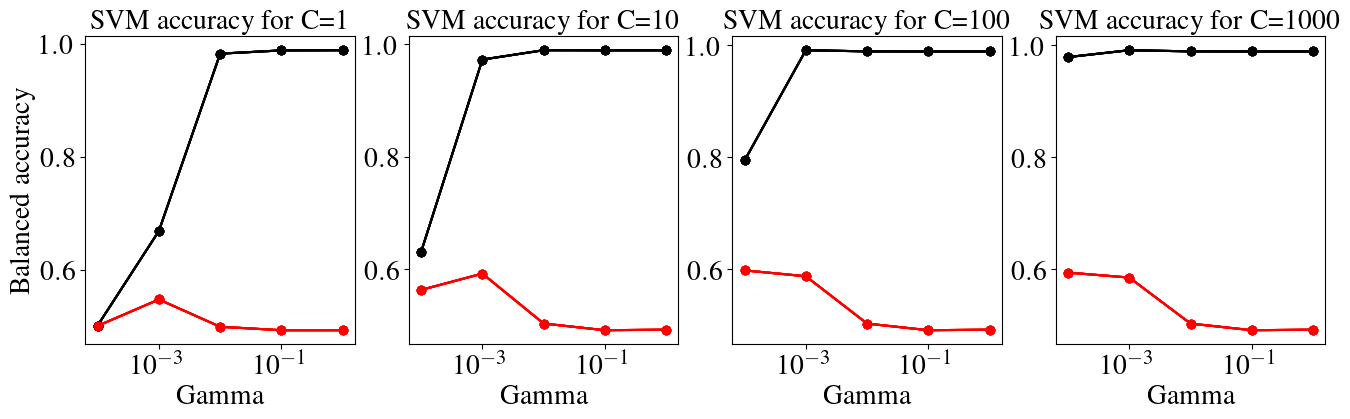

In [18]:
SVM_model = svm.SVM()

# Load data matrix
data_matrix_file_name = '../data/featurized_data_matrix/featurizations_for_term_project/MathFeat.csv'
SVM_model.load_data(data_matrix_file_name)

# Split train and test data
SVM_model.split_train_test()

# Sweep through the hyperparameters gamma and C, to obtain the best model
c_range = [1, 10, 100, 1000]
gamma_range = [1e-4, 1e-3, 1e-2, 1e-1, 1]

train_accuracy_matrix = []
test_accuracy_matrix = []

# Build model
for i in range(len(c_range)):
    
    train_accuracy_list = []
    test_accuracy_list = []
    
    for gamma in gamma_range:
        SVM_model.build(kernel='rbf', gamma=gamma, c=c_range[i])
        train_accuracy_list.append(SVM_model.train())
        test_accuracy_list.append(SVM_model.evaluate())
        
    train_accuracy_matrix.append(train_accuracy_list)
    test_accuracy_matrix.append(test_accuracy_list)

plot_name = 'SVM_performance/SVM_performance_mathfeatures'

fig, axs = plt.subplots(1, len(c_range), figsize=(16, 4))

for i in range(len(c_range)):
    for gamma in gamma_range:
        axs[i].plot(gamma_range, train_accuracy_matrix[i], '-ko', label='Train accuracy')
        axs[i].plot(gamma_range, test_accuracy_matrix[i], '-ro', label='Test accuracy')
        axs[i].set_xlabel('Gamma', fontsize=20)
        axs[i].set_title('SVM accuracy for C={}'.format(c_range[i]), fontsize=20)
        axs[i].set_xscale('log')

        axs[0].set_ylabel('Balanced accuracy', fontsize=20)
        
plt.savefig(plot_name + '.svg', format='svg', dpi=600)
plt.savefig(plot_name + '.png', format='png', dpi=600)

C_mat, Gamma = np.meshgrid(c_range, gamma_range)
with open(plot_name + '.pkl', 'wb') as f:
    pkl.dump({'C_values': C_mat, 'gamma_values': Gamma, 'accuracy': test_accuracy_matrix}, f)
    
print(C_mat, Gamma, test_accuracy_matrix)

In [19]:
    
print(C_mat, Gamma, test_accuracy_matrix)

[[   1   10  100 1000]
 [   1   10  100 1000]
 [   1   10  100 1000]
 [   1   10  100 1000]
 [   1   10  100 1000]] [[1.e-04 1.e-04 1.e-04 1.e-04]
 [1.e-03 1.e-03 1.e-03 1.e-03]
 [1.e-02 1.e-02 1.e-02 1.e-02]
 [1.e-01 1.e-01 1.e-01 1.e-01]
 [1.e+00 1.e+00 1.e+00 1.e+00]] [[0.5, 0.5468497329406383, 0.49847476666991997, 0.49232981783317353, 0.49232981783317353], [0.5630053411872324, 0.5920307036932846, 0.5032207875715491, 0.4913710450623202, 0.49232981783317353], [0.5981928759929804, 0.5877076144929699, 0.5032207875715491, 0.4913710450623202, 0.49232981783317353], [0.5942534872728177, 0.5853499137869993, 0.5032207875715491, 0.4913710450623202, 0.49232981783317353]]
